# Titanic Survival Prediction

## Import library & Load Data

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve


In [2]:
df = pd.read_csv(r"Titanic_Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

###  Bar charts & Pie charts

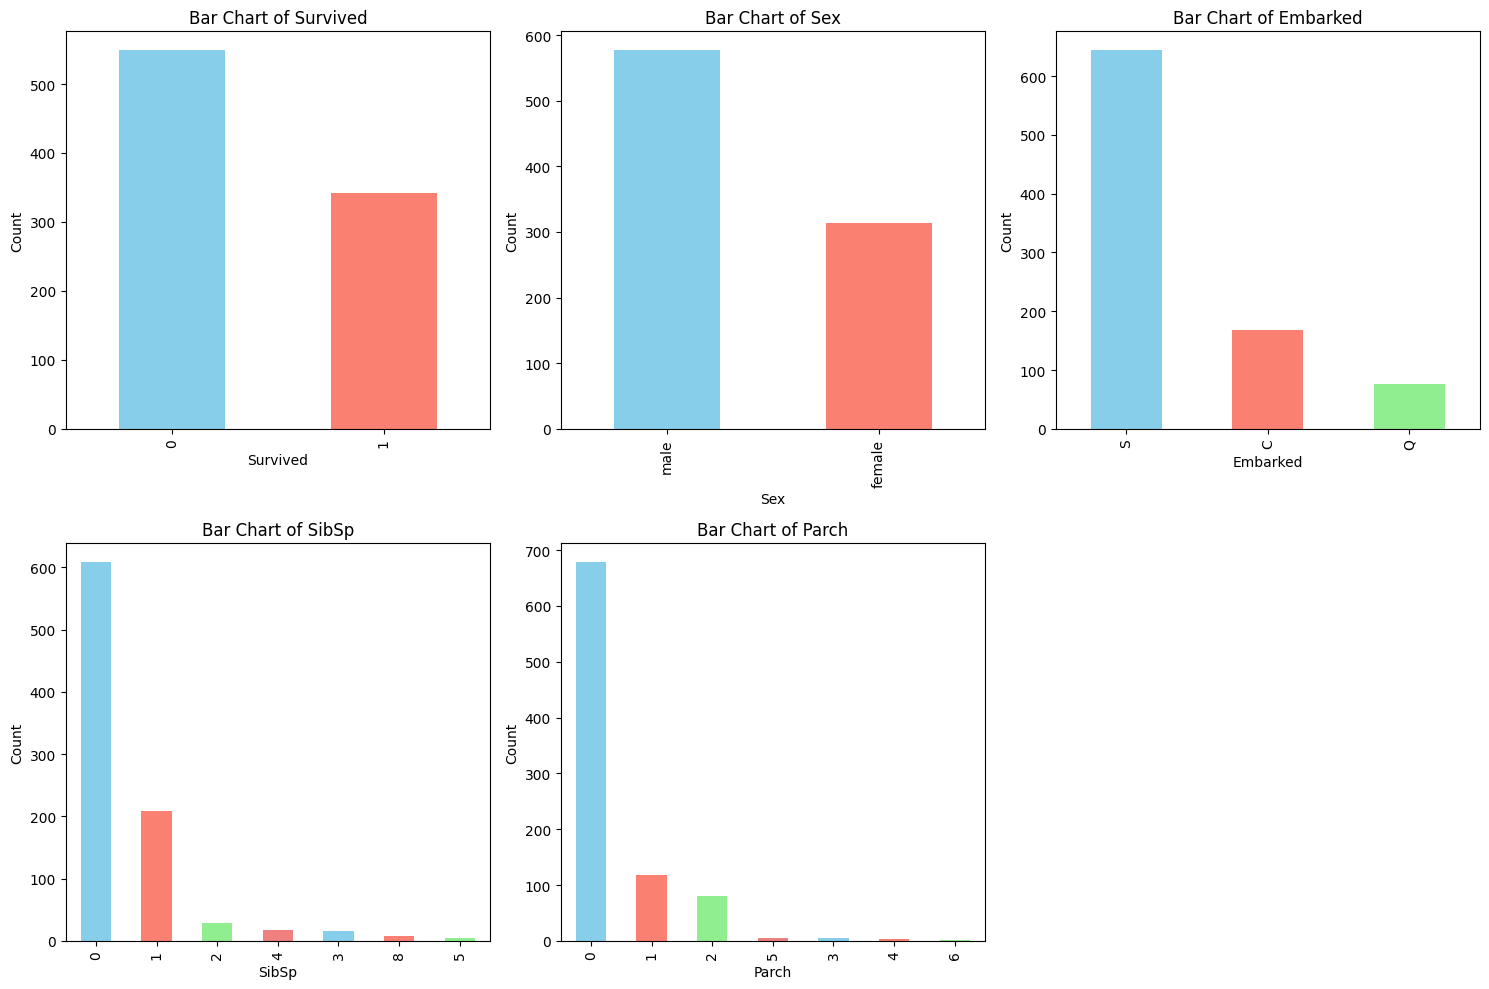

In [7]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Survived','Sex','Embarked', 'SibSp',  'Parch']): 
    plt.subplot(2,3,i+1)
    df[col].value_counts().plot(kind='bar', color=['skyblue', 'salmon','lightgreen', 'lightcoral'])
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

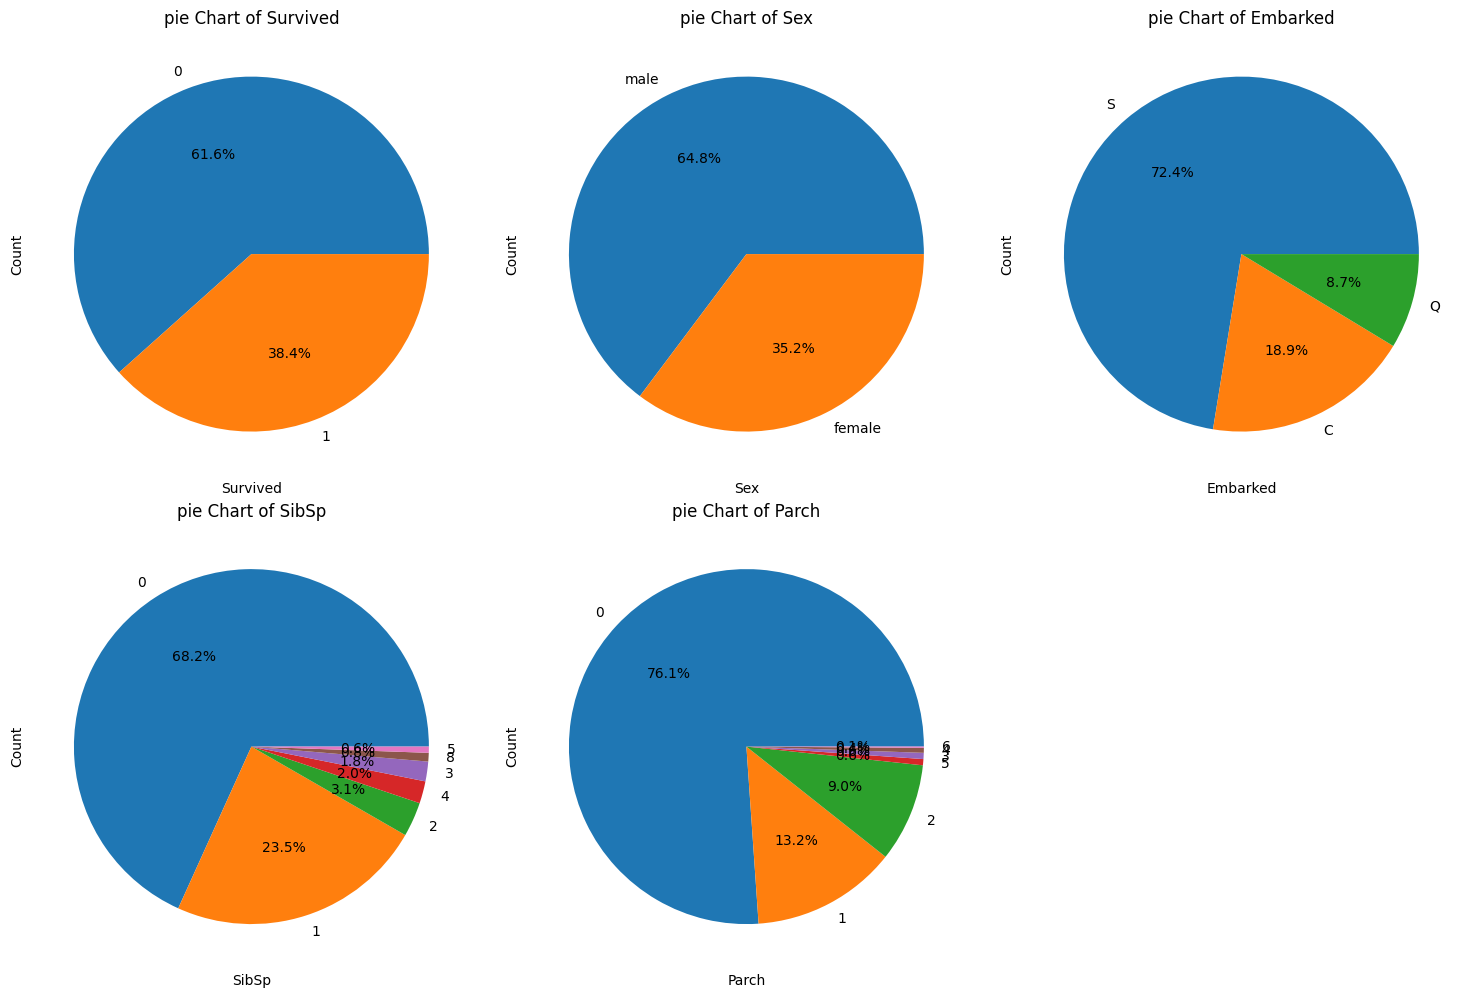

In [8]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Survived','Sex','Embarked', 'SibSp','Parch']): 
    plt.subplot(2,3,i+1)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', color=['skyblue', 'salmon','lightgreen', 'lightcoral'])
    plt.title(f"pie Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

###  Scatter plots by Pairplot

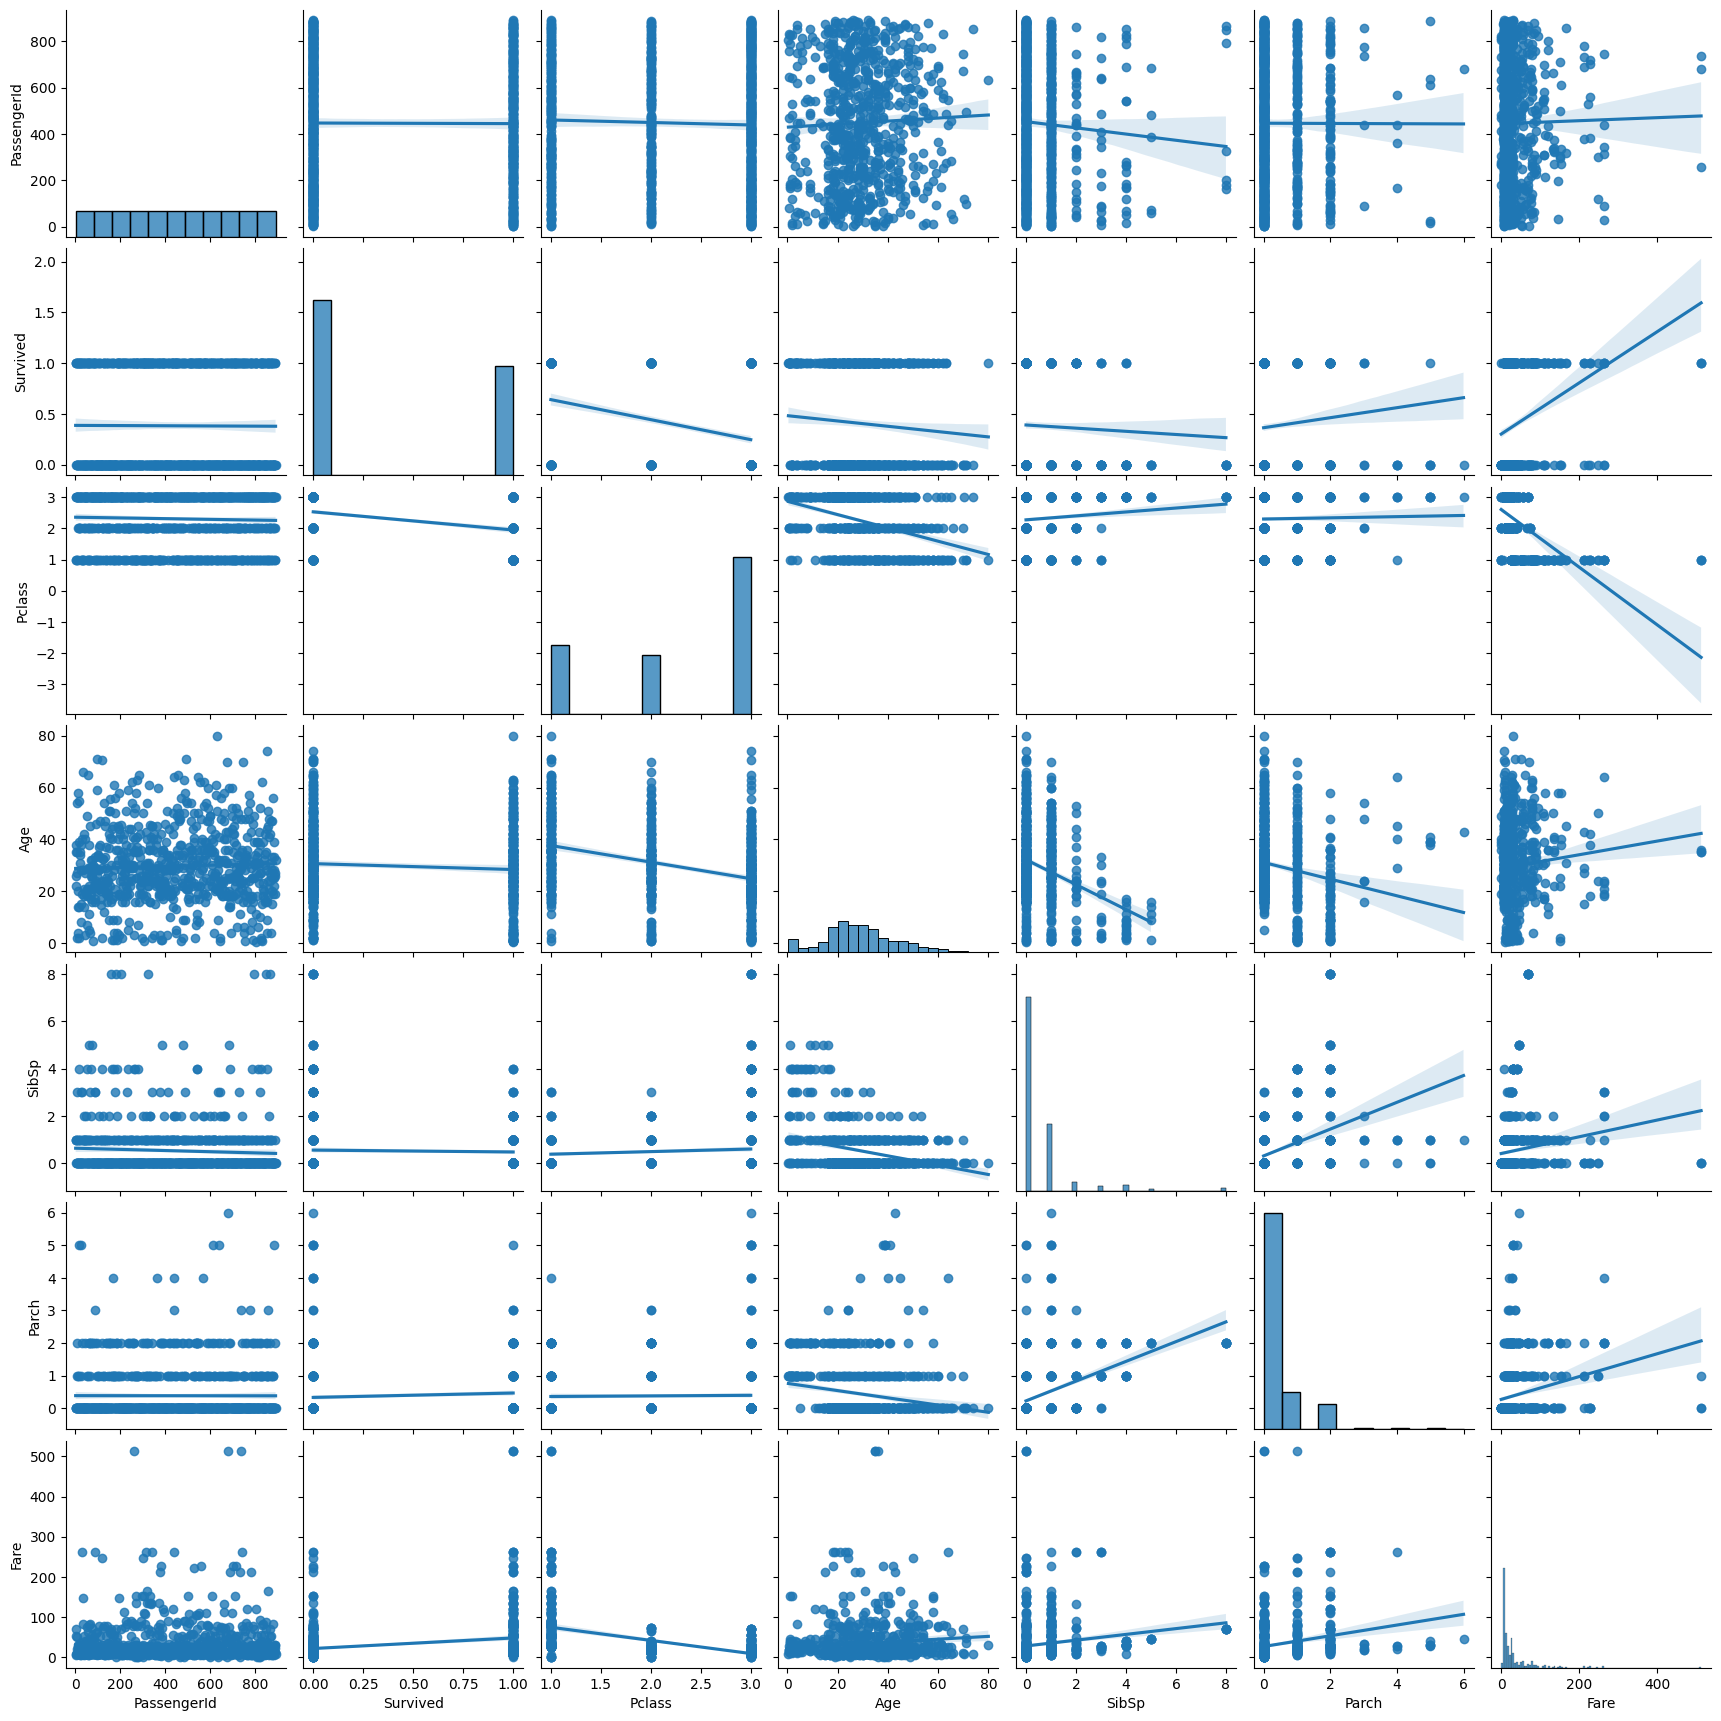

In [9]:
sns.pairplot(df,diag_kind='hist',kind='reg')
plt.show()


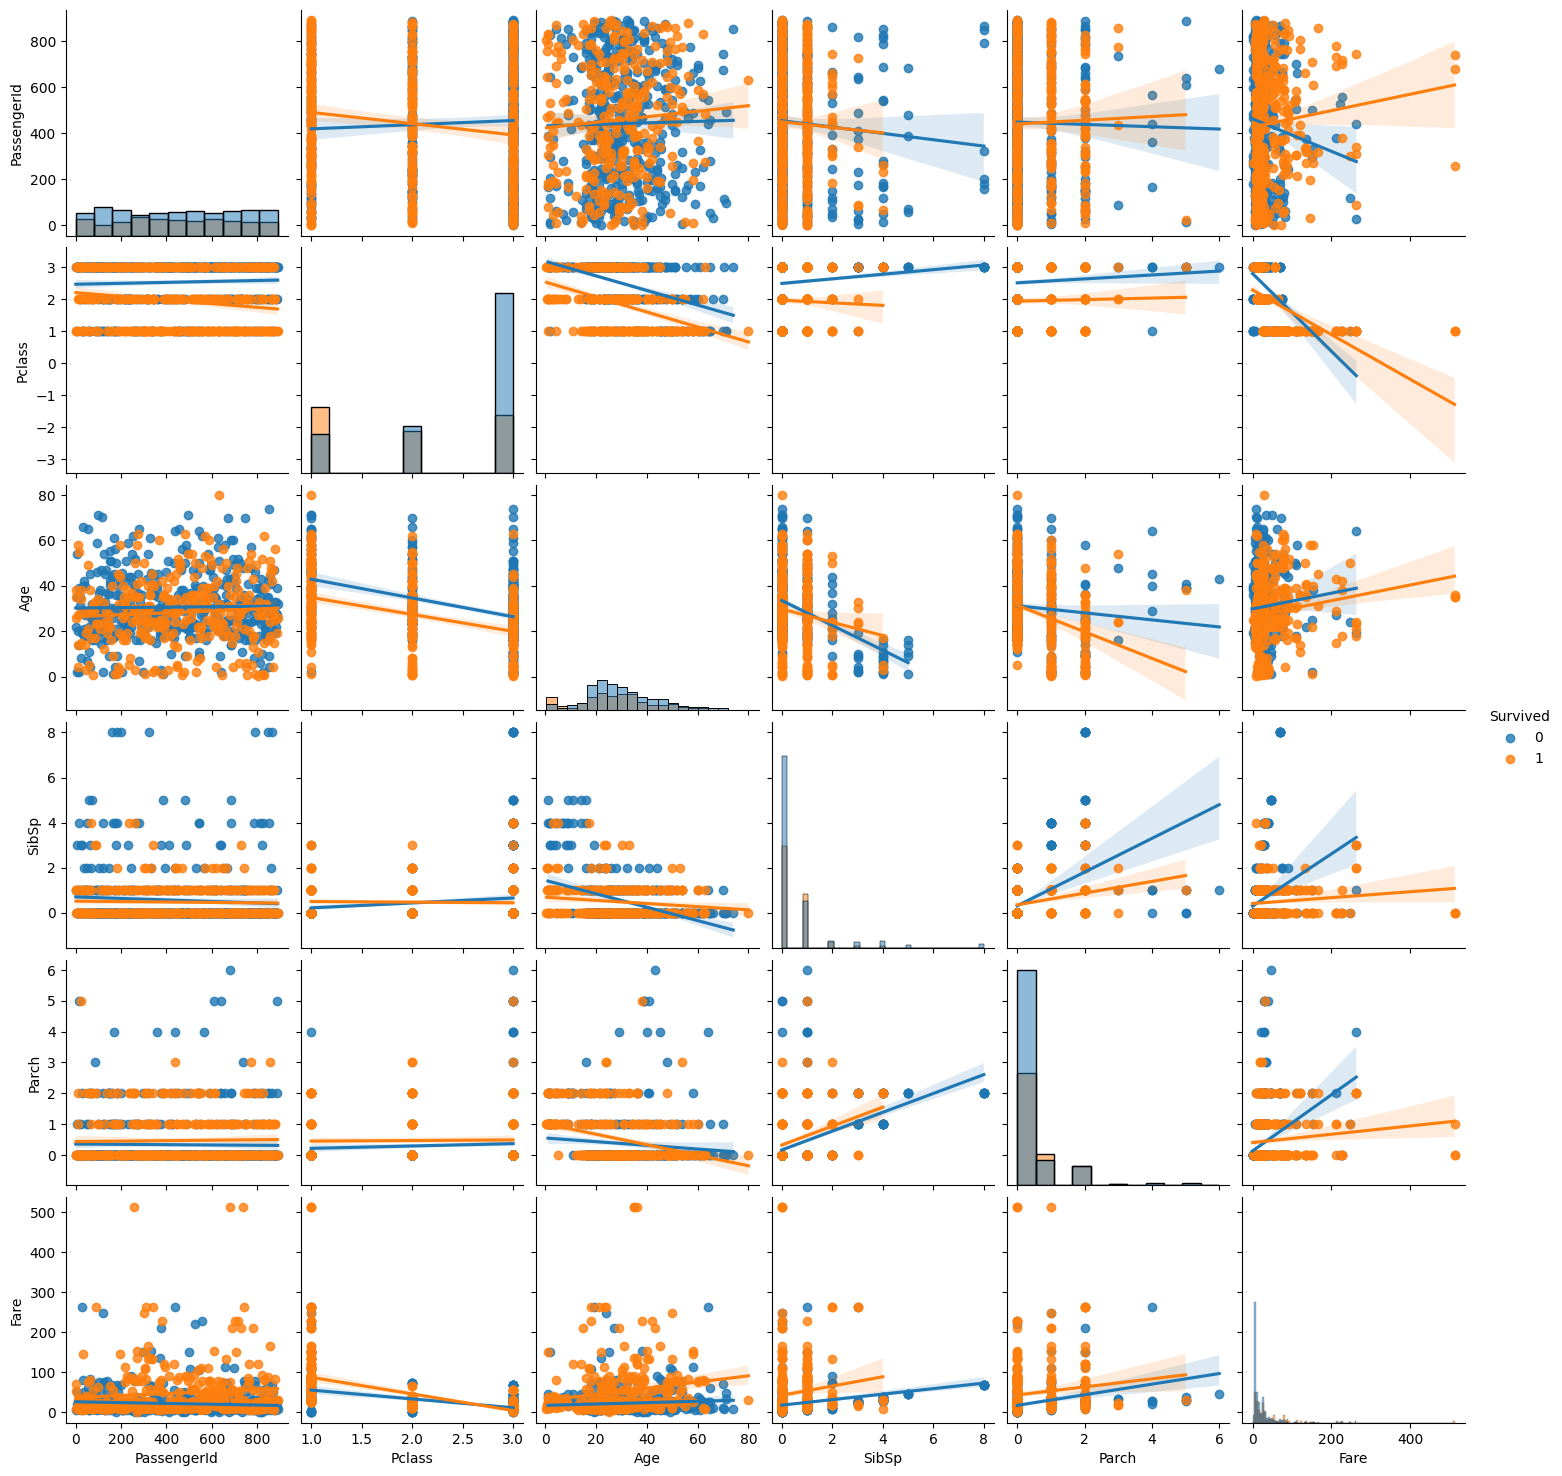

In [10]:
sns.pairplot(df, hue="Survived",diag_kind='hist',kind='reg')
plt.show()


### Box Plots to Detect Outliers


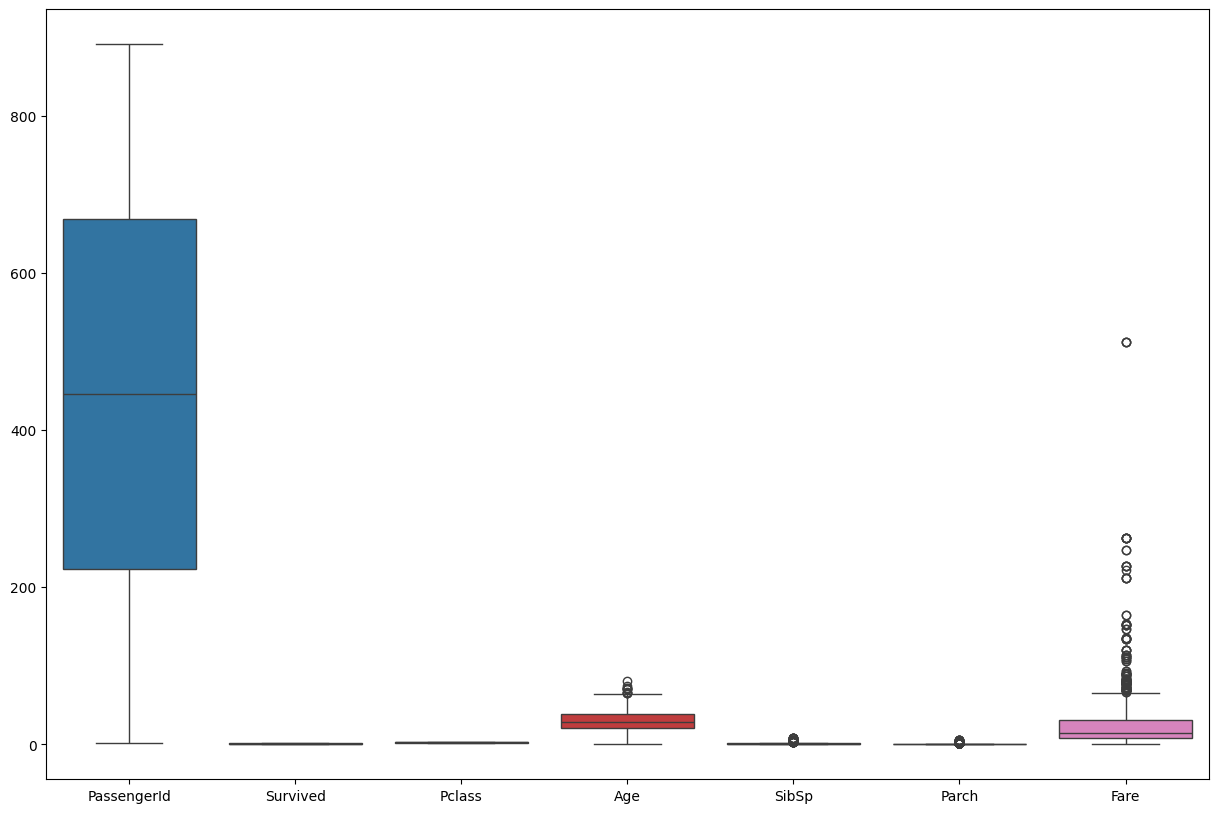

In [11]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df)
plt.show()

### Histograms to Determine Distribution

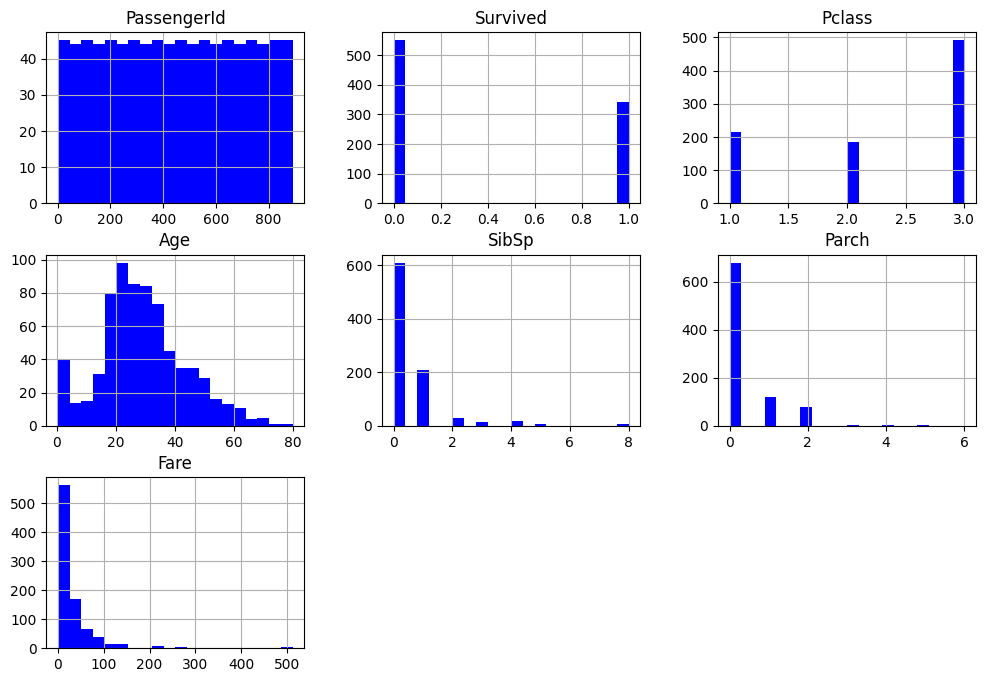

In [12]:
df.hist(figsize=(12,8),bins=20,color='blue')
plt.show()

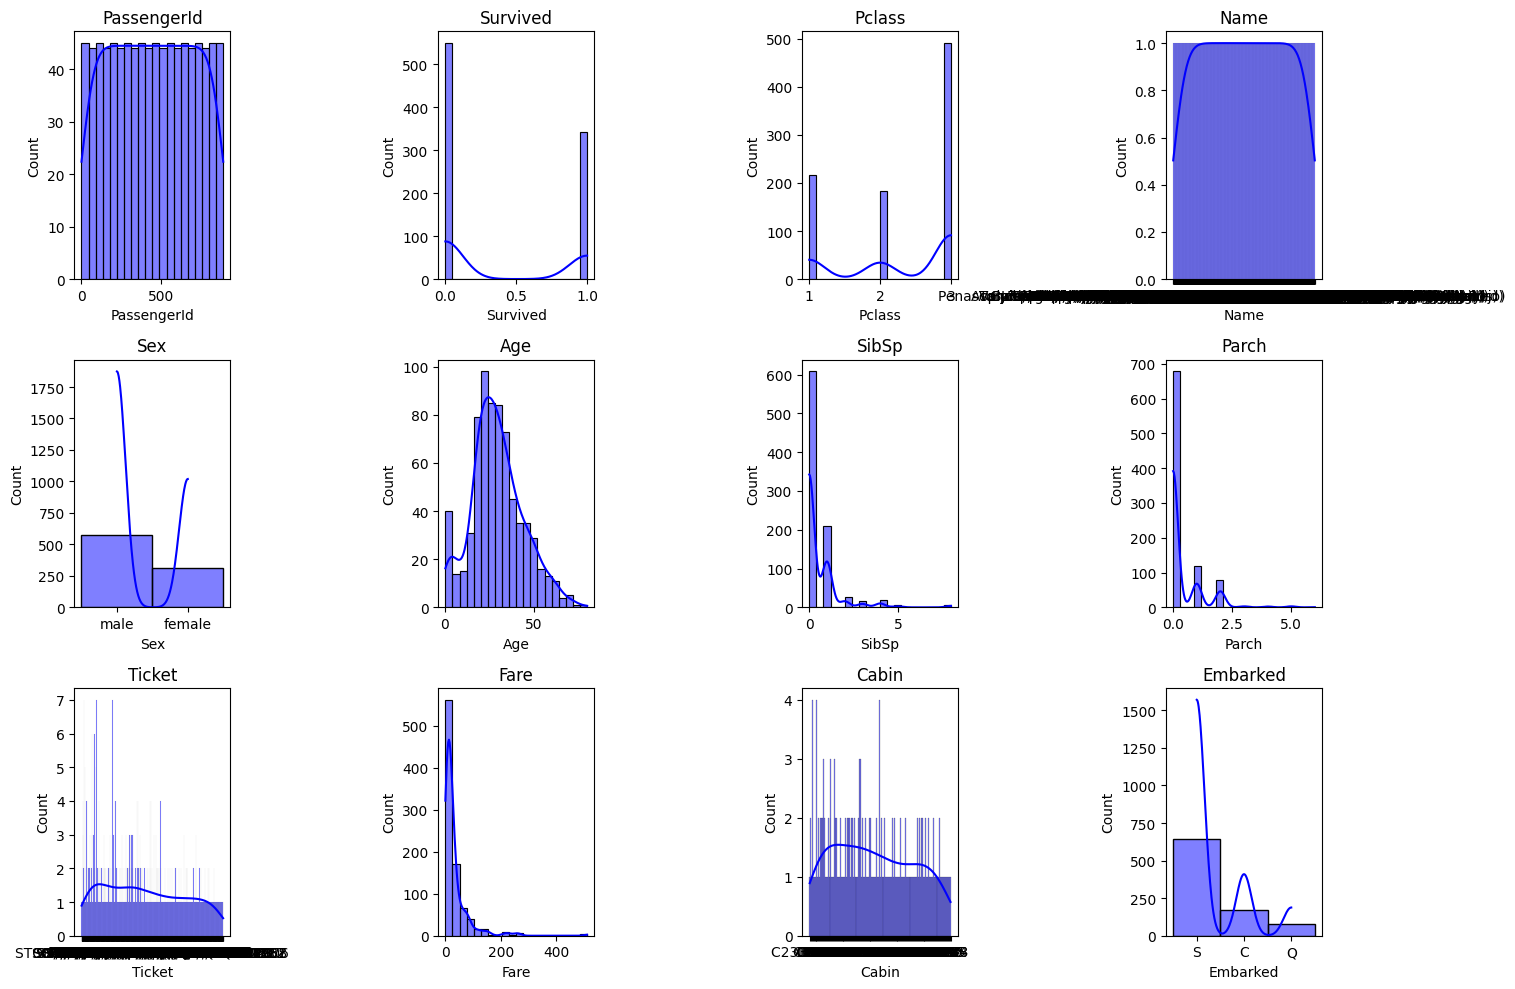

In [13]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns): 
    plt.subplot(3,4,i+1)
    sns.histplot(df[col],bins=20,kde=True, color='blue')
    plt.title(col)

plt.tight_layout()
plt.show()

##  Data Cleaning

### Missing Values

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)


In [16]:
df['Cabin']=df['Cabin'].fillna('Unknown')

In [17]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C


## Data Preparation

### Encoding

In [20]:
def encode_sex(sex): 
    if sex =="male":
        return 1
    else:
        return 0
        

In [21]:
df['Sex'] = df['Sex'].apply(encode_sex)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


### Title Extraction

In [22]:
Title=[]
for i in df['Name']:
    i=i.split()
    found = 'No Title'
    for t in i :        
        if t  in ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Jonkheer.','Countess.']: 
            found = t
            break
            
    Title.append(found)
        
        

print(Title)

['Mr.', 'Mrs.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Master.', 'Mrs.', 'Mrs.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mrs.', 'Master.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Don.', 'Mrs.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Mrs.', 'Mrs.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Master.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Master.', 'Mr.', 'Miss.', 'Mr.', 'Master.', 'Mr.', 'Master.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Master.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Master.', 'Mr.', 

In [23]:
set(Title)

{'Capt.',
 'Col.',
 'Countess.',
 'Don.',
 'Dr.',
 'Jonkheer.',
 'Lady.',
 'Major.',
 'Master.',
 'Miss.',
 'Mlle.',
 'Mme.',
 'Mr.',
 'Mrs.',
 'Ms.',
 'Rev.',
 'Sir.'}

In [24]:
df['Title'] = Title

In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,Mr.
5,6,0,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,Unknown,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,Unknown,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,Unknown,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,Unknown,C,Mrs.


In [26]:
df['Title'] = df['Title'].replace([
    'Don.', 'Rev.', 'Dr.', 'Major.', 'Lady.', 'Sir.',
    'Col.', 'Capt.', 'Countess.', 'Jonkheer.'
], 'Rare')

df['Title'] = df['Title'].replace({
    'Mlle.': 'Miss.',
    'Ms.': 'Miss.',
    'Mme.': 'Mrs.'
})
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,Mr.
5,6,0,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,Unknown,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,Unknown,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,Unknown,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,Unknown,C,Mrs.


In [27]:
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rare'], dtype=object)

In [28]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Family Size &  IsAlone

In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1 ).astype(int) 

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr.,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,Mr.,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,S,Rare,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss.,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,Unknown,S,Miss.,4,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr.,1,1


### Has_Cabin

In [30]:
df["Has_Cabin"]=(df['Cabin'] != 'Unknown').astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr.,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,Mr.,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,S,Rare,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss.,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,Unknown,S,Miss.,4,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr.,1,1,1


### Drop Feature 

In [31]:
df.drop('Cabin', axis=1, inplace=True)
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Has_Cabin
0,0,3,1,22.0,1,0,7.2500,S,Mr.,2,0,0
1,1,1,0,38.0,1,0,71.2833,C,Mrs.,2,0,1
2,1,3,0,26.0,0,0,7.9250,S,Miss.,1,1,0
3,1,1,0,35.0,1,0,53.1000,S,Mrs.,2,0,1
4,0,3,1,35.0,0,0,8.0500,S,Mr.,1,1,0
5,0,3,1,25.0,0,0,8.4583,Q,Mr.,1,1,0
6,0,1,1,54.0,0,0,51.8625,S,Mr.,1,1,1
7,0,3,1,2.0,3,1,21.0750,S,Master.,5,0,0
8,1,3,0,27.0,0,2,11.1333,S,Mrs.,3,0,0
9,1,2,0,14.0,1,0,30.0708,C,Mrs.,2,0,0


### One-Hot Encoding

In [32]:
df = pd.get_dummies(df, columns=['Title'], drop_first=True , dtype=int)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True , dtype=int) 

In [33]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,0,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,1,0,1,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,2,0,1,0,0,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,0,1
5,0,3,1,25.0,0,0,8.4583,1,1,0,0,1,0,0,1,0
6,0,1,1,54.0,0,0,51.8625,1,1,1,0,1,0,0,0,1
7,0,3,1,2.0,3,1,21.0750,5,0,0,0,0,0,0,0,1
8,1,3,0,27.0,0,2,11.1333,3,0,0,0,0,1,0,0,1
9,1,2,0,14.0,1,0,30.0708,2,0,0,0,0,1,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   FamilySize   891 non-null    int64  
 8   IsAlone      891 non-null    int32  
 9   Has_Cabin    891 non-null    int32  
 10  Title_Miss.  891 non-null    int32  
 11  Title_Mr.    891 non-null    int32  
 12  Title_Mrs.   891 non-null    int32  
 13  Title_Rare   891 non-null    int32  
 14  Embarked_Q   891 non-null    int32  
 15  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(8), int64(6)
memory usage: 83.7 KB


In [35]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'IsAlone', 'Has_Cabin', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Rare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Train-Test Split

In [37]:
df['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [38]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [39]:
x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,1,0,0,1,0,0,0
2,3,0,26.0,0,0,7.9250,1,1,0,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,0,1,0,0,1,0,0,1
4,3,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,0,1


In [40]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 ,stratify = y )

## Model Building

### Logistic Regression

In [42]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [43]:
model = LogisticRegression(max_iter=1000 , class_weight='balanced',random_state=42 )
model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [44]:
y_pred = model.predict(x_test_scaled)

#### Model Evaluation
  - Confusion Matrix 
- Classification Report

In [45]:
print(confusion_matrix(y_test, y_pred))

[[92 18]
 [12 57]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.76      0.83      0.79        69

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.83      0.83       179



In [47]:
accuracy_score(y_test, y_pred)*100

83.24022346368714

#### Overfitting Check
- Cross Validation
- Learning Curve

In [48]:
train_pred = model.predict(x_train_scaled)
test_pred  = model.predict(x_test_scaled)

print("Train:", accuracy_score(y_train, train_pred))
print("Test :", accuracy_score(y_test, test_pred))


Train: 0.8258426966292135
Test : 0.8324022346368715


In [52]:
train_sizes, train_scores, test_scores = learning_curve(
    model,
    x,
    y,
    cv=5,
    scoring='f1'
)

print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[0.82700675 0.77396155 0.78107553 0.77931775 0.7808756 ]
[0.71219242 0.75361931 0.75352946 0.75811475 0.76667669]


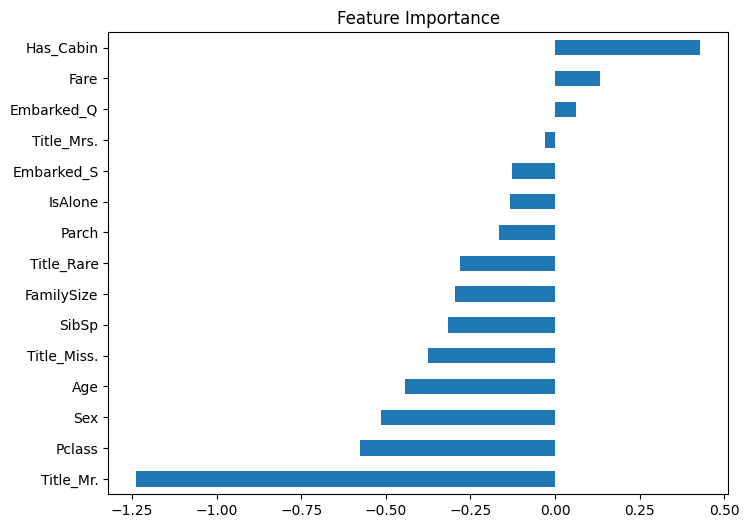

In [53]:
importance = pd.Series(
    model.coef_[0],
    index=x.columns
).sort_values()

importance.plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()


### Random Forest

In [69]:
model2 = RandomForestClassifier(n_estimators=200, max_depth=5,min_samples_leaf=5,class_weight='balanced',random_state=42)

model2.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       n_estimators=200, random_state=42)

In [70]:
y_pred2=model2.predict(x_test)

#### Model Evaluation
  - Confusion Matrix
 - Classification Report

In [71]:
print(confusion_matrix(y_test, y_pred2))

[[89 21]
 [15 54]]


In [72]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       110
           1       0.72      0.78      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



In [73]:
accuracy_score(y_test, y_pred2)*100

79.88826815642457

#### Overfitting Check
- Cross Validation
- Learning Curve

In [74]:
train_pred = model2.predict(x_train)
test_pred  = model2.predict(x_test)

print("Train:", accuracy_score(y_train, train_pred))
print("Test :", accuracy_score(y_test, test_pred))


Train: 0.8595505617977528
Test : 0.7988826815642458


In [75]:
train_sizes, train_scores, test_scores = learning_curve(
    model2,
    x,
    y,
    cv=5,
    scoring='f1'
)

print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[0.77147708 0.78017266 0.7954974  0.78979332 0.79858691]
[0.71376658 0.76060123 0.76034511 0.75687637 0.76460027]


### Gradient Boosting

In [76]:
model3 = GradientBoostingClassifier( n_estimators=150, learning_rate=0.05, max_depth=3, subsample=0.8,random_state=42)

model3.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150,
                           random_state=42, subsample=0.8)

In [77]:
y_pred3=model3.predict(x_test)

#### Model Evaluation
  - Confusion Matrix
 - Classification Report

In [78]:
print(confusion_matrix(y_test, y_pred3))

[[97 13]
 [21 48]]


In [79]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [81]:
accuracy_score(y_test, y_pred3)*100

81.00558659217877

#### Overfitting Check
- Cross Validation
- Learning Curve

In [82]:
train_pred = model3.predict(x_train)
test_pred  = model3.predict(x_test)

print("Train:", accuracy_score(y_train, train_pred))
print("Test :", accuracy_score(y_test, test_pred))


Train: 0.9030898876404494
Test : 0.8100558659217877


In [83]:
train_sizes, train_scores, test_scores = learning_curve(
    model3,
    x,
    y,
    cv=5,
    scoring='f1'
)
print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[0.99428571 0.91728125 0.88046427 0.86814525 0.86147521]
[0.63970585 0.73478215 0.75661061 0.77530219 0.77169658]


## Model Comparison

In this section, we compare the performance of the three machine learning models trained on the Titanic dataset.

| Model                | Train Accuracy | Test Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) | Notes |
|---------------------|----------------|---------------|--------------------|----------------|------------------|-------|
| Logistic Regression | 82.6%          | 83.2%         | 0.76               | 0.83           | 0.79             | Balanced class weights, scaled features. Good generalization, low overfitting. |
| Random Forest       | 85.9%          | 79.9%         | 0.72               | 0.78           | 0.75             | Slight overfitting observed, robust to non-linearities. |
| Gradient Boosting   | 90.3%          | 81.0%         | 0.79               | 0.70           | 0.74             | Higher training accuracy indicates more complexity, good test performance, careful with overfitting. |

### Observations
- **Logistic Regression** gives the best test accuracy and balanced metrics, making it reliable for generalization.  
- **Random Forest** slightly overfits, achieving higher training accuracy than test accuracy, but is robust to noise.  
- **Gradient Boosting** has the highest training accuracy but slightly lower recall for the positive class, indicating it may focus more on class 0 patterns.  

**Recommendation:** Logistic Regression is a strong baseline. Random Forest and Gradient Boosting can be further tuned for better F1-score, especially for class 1 (survival).